> 문자 제거 & 불용어 처리

In [1]:
s="Hello World"
print(s.lower()) #소문자로 변환
print(s.upper()) #대문자로 변환

hello world
HELLO WORLD


In [2]:
import re

# 숫자 제거
p = re.compile('[0-9]+')
result = p.sub('','올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다')
result

'올해 들어 서울 지역의 부동산 가격이 % 하락했습니다'

In [3]:
# 숫자 & 특수문자 제거
def clean_text(input_data):
    p = re.compile('[0-9_!@#$%^&*]')
    result = p.sub('', input_data)
    return result

txt = "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123"
print(txt)
print(clean_text(txt))

올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123
올해 들어 서울 지역의 부동산 가격이  하락했습니다


In [4]:
# 한글 불용어 처리
words = ["추석","연휴","민족","대이동","시작","늘어",
        "교통량","교통사고","특히","자동차", "고장","상당수","나타","것","기자"]
stopwords = ["가다","늘어","나타","것","기자"]  # 불용어

[i for i in words if i not in stopwords]    # 불용어 제거

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수']

In [5]:
# 영어 불용어 처리
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

words = ["chief","justice","roberts",",","president","carter",
            ",","president","clinton","president","bush","obama",
            "fellow","americans","and","people","of","the",
            "world","thank","you"]

[w for w in words if not w in stopwords.words("english")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['chief',
 'justice',
 'roberts',
 ',',
 'president',
 'carter',
 ',',
 'president',
 'clinton',
 'president',
 'bush',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank']

In [6]:
nltk.download('punkt')  # 문장 쪼개는 툴

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

> 어근 동일화

In [16]:
#어근 동일화 처리 : 비슷한 어근 처리(stemming)
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stm = PorterStemmer()
txt = "cook cooker cooking cooks cookery"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')
print('')

#어근이 동일한 키워드 정리
txt2="pythoning pythons Python pythoners pythoned"
words2=word_tokenize(txt2)
for w in words2:
    print(stm.stem(w),end=" ")

cook cooker cook cook cookeri 
python python python python python 

In [15]:
#LancasterStemmer : PorterStemmer와 비슷하지만 좀더 나은 성능
from nltk.stem.lancaster import LancasterStemmer

stm=LancasterStemmer()
txt="cook cooker cooking cooks cookery"
words=word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")
print('')

#어근이 동일한 키워드 정리
txt2="pythoning pythons Python pythoners pythoned"
words2=word_tokenize(txt2)
for w in words2:
    print(stm.stem(w),end=" ")

cook cook cook cook cookery 
python python python python python 

In [19]:
#Porter나 Lancaster가 처리하지 못하는 경우에는
#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함
from nltk.stem.regexp import RegexpStemmer
stm = RegexpStemmer('ing')
print(stm.stem('cooking'))
print(stm.stem('cookery'))
print(stm.stem('ingleside'))
print('')

stm=RegexpStemmer("python")
txt="pythoning pythons Python pythoners pythoned"
words=word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

cook
cookery
leside

ing s Python ers ed 

> N-gram : n번 연이어 등장하는 단어들의 연쇄

In [20]:
txt = 'Hello'
for i in range(len(txt) - 1):
    # 현재 문자와 그다음 문자 출력
    print(txt[i], txt[i + 1], sep='')

He
el
ll
lo


In [21]:
txt = 'this is python script'
# 공백을 기준으로 문자열을 분리하여 리스트로 저장
words = txt.split()
# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
for i in range(len(words) - 1):
    # 현재 문자열과 그다음 문자열 출력
    print(words[i], words[i + 1])

this is
is python
python script


In [22]:
txt = 'hello'
two_gram = zip(txt, txt[1:])
for i in two_gram:
    print(i[0], i[1], sep='')

he
el
ll
lo


In [23]:
txt = 'this is python script'
words = txt.split()
list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [24]:
from nltk import ngrams

sentence = "I love you. Good morning. Good bye."
grams = ngrams(sentence.split(),2)
for gram in grams:
    print(gram,end=" ")

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [25]:
sentence = "I love you. Good morning. Good bye."
grams = ngrams(sentence.split(),3)
for gram in grams:
    print(gram,end=" ")

('I', 'love', 'you.') ('love', 'you.', 'Good') ('you.', 'Good', 'morning.') ('Good', 'morning.', 'Good') ('morning.', 'Good', 'bye.') 

> 한국어 말뭉치

In [27]:
#헌법 말뭉치
from konlpy.corpus import kolaw
#말뭉치에 포함된 파일 목록
kolaw.fileids()

['constitution.txt']

In [28]:
#헌법
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [29]:
#국회의안 말뭉치
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [30]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


> 한국어 품사 분석

In [36]:
# 한나눔 패키지
from konlpy.tag import Hannanum
han = Hannanum()

txt = """원/달러 환율이 3년 5개월 만에 최고치로 마감하고,
위안화 환율이 11년 만에 달러당 7위안을 넘었다.
원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다."""

print('형태소 분석: ', han.morphs(txt))
print('명사 추출: ', han.nouns(txt))
print('형태소와 품사: ', han.pos(txt))
print('품사 목록: ', han.tagset)

형태소 분석:  ['원', '/', '달러', '환율', '이', '3년', '5개월', '만', '에', '최고치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만', '에', '달러당', '7위', '안', '을', '넘', '었다', '.', '원', '/', '엔', '재정환율', '역시', '100엔', '당', '30원', '가까이', '뛰', '었다', '.']
명사 추출:  ['원', '달러', '환율', '3년', '5개월', '만', '최고치', '마감', '위안화', '환율', '11년', '만', '달러당', '7위', '원', '엔', '재정환율', '100엔', '30원']
형태소와 품사:  [('원', 'N'), ('/', 'S'), ('달러', 'N'), ('환율', 'N'), ('이', 'J'), ('3년', 'N'), ('5개월', 'N'), ('만', 'N'), ('에', 'J'), ('최고치', 'N'), ('로', 'J'), ('마감', 'N'), ('하고', 'J'), (',', 'S'), ('위안화', 'N'), ('환율', 'N'), ('이', 'J'), ('11년', 'N'), ('만', 'N'), ('에', 'J'), ('달러당', 'N'), ('7위', 'N'), ('안', 'X'), ('을', 'J'), ('넘', 'P'), ('었다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('엔', 'N'), ('재정환율', 'N'), ('역시', 'M'), ('100엔', 'N'), ('당', 'X'), ('30원', 'N'), ('가까이', 'M'), ('뛰', 'P'), ('었다', 'E'), ('.', 'S')]
품사 목록:  {'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언',

In [37]:
# 꼬꼬마 패키지
from konlpy.tag import Kkma
kkm = Kkma()

print('형태소 분석: ', kkm.morphs(txt))
print('명사 추출: ', kkm.nouns(txt))
print('형태소와 품사: ', kkm.pos(txt))
print('품사 목록: ', kkm.tagset)

형태소 분석:  ['원', '/', '달러', '환율', '이', '3', '년', '5', '개월', '만', '에', '최고', '치', '로', '마감', '하', '고', ',', '위', '안화', '환율', '이', '11', '년', '만', '에', '달', '러', '당', '7', '위', '안', '을', '넘', '었', '다', '.', '원', '/', '엔', '재정', '환율', '역시', '100', '엔', '당', '30', '원', '가까이', '뛰', '었', '다', '.']
명사 추출:  ['원', '달러', '환율', '3', '3년', '년', '5', '5개월', '개월', '만', '최고', '마감', '위', '위안화', '안화', '11', '11년', '당', '7', '7위안', '안', '엔', '재정', '재정환율', '100', '100엔당', '엔', '30', '30원']
형태소와 품사:  [('원', 'NNM'), ('/', 'SP'), ('달러', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('3', 'NR'), ('년', 'NNM'), ('5', 'NR'), ('개월', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('최고', 'NNG'), ('치', 'XSN'), ('로', 'JKM'), ('마감', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), (',', 'SP'), ('위', 'NNG'), ('안화', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('11', 'NR'), ('년', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('달', 'VV'), ('러', 'ECD'), ('당', 'NNG'), ('7', 'NR'), ('위', 'NNG'), ('안', 'NNG'), ('을', 'JKO'), ('넘', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')

In [38]:
# 트위터 패키지 
# 트위터에서 개발, 2017년 이후 오픈코리안텍스트로 이름이 바뀜
from konlpy.tag import Okt
okt = Okt()

print('형태소 분석: ', okt.morphs(txt))
print('명사 추출: ', okt.nouns(txt))
print('형태소와 품사: ', okt.pos(txt))
print('품사 목록: ', okt.tagset)
print('어구 추출: ', okt.phrases(txt))

형태소 분석:  ['원', '/', '달러', '환율', '이', '3년', '5', '개월', '만에', '최고', '치', '로', '마감', '하고', ',', '\n', '위안화', '환율', '이', '11년', '만에', '달러', '당', '7위안', '을', '넘었다', '.', '\n', '원', '/', '엔', '재정', '환율', '역시', '100엔', '당', '30원', '가까이', '뛰었다', '.']
명사 추출:  ['원', '달러', '환율', '개월', '최고', '치', '마감', '위안화', '환율', '달러', '원', '재정', '환율', '역시', '가까이']
형태소와 품사:  [('원', 'Noun'), ('/', 'Punctuation'), ('달러', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('3년', 'Number'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('최고', 'Noun'), ('치', 'Noun'), ('로', 'Josa'), ('마감', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('\n', 'Foreign'), ('위안화', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('11년', 'Number'), ('만에', 'Josa'), ('달러', 'Noun'), ('당', 'Suffix'), ('7위안', 'Number'), ('을', 'Foreign'), ('넘었다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('원', 'Noun'), ('/', 'Punctuation'), ('엔', 'Josa'), ('재정', 'Noun'), ('환율', 'Noun'), ('역시', 'Noun'), ('100엔', 'Number'), ('당', 'Foreign'), ('30원', 'Number'), ('가까이', 'N

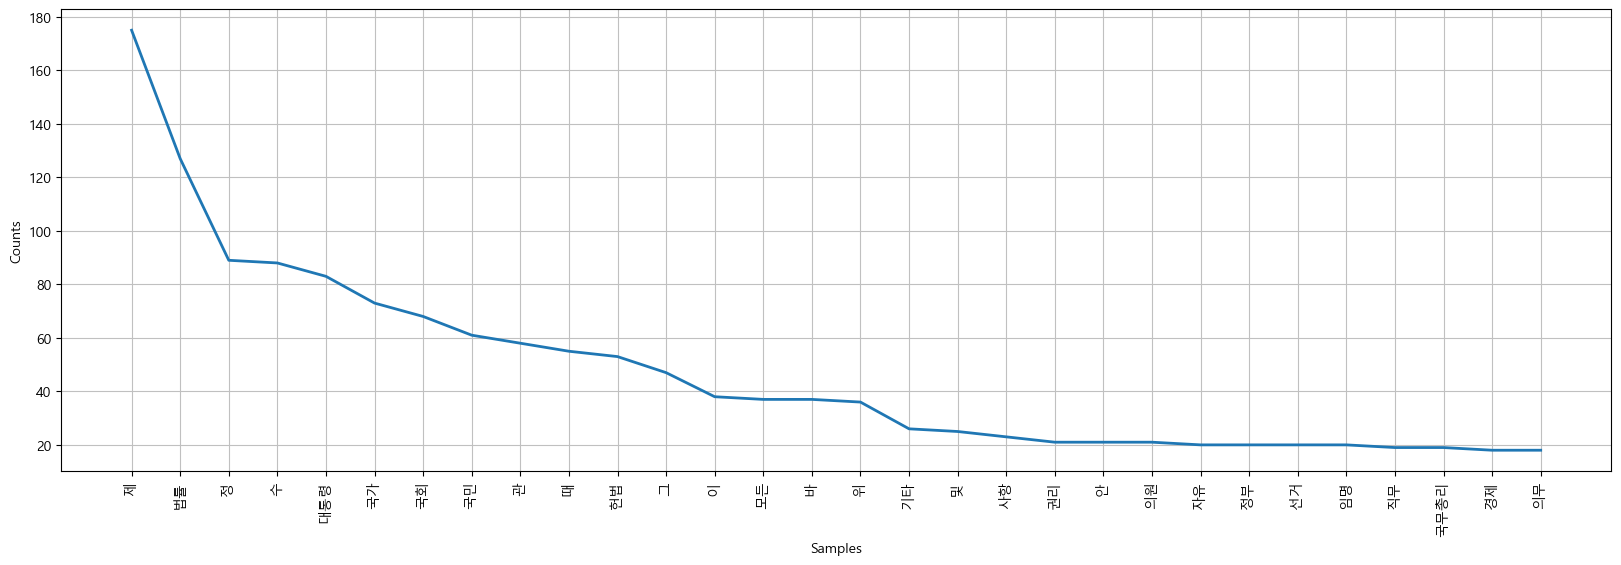

In [39]:
#단어 출현 빈도
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from nltk import Text

plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

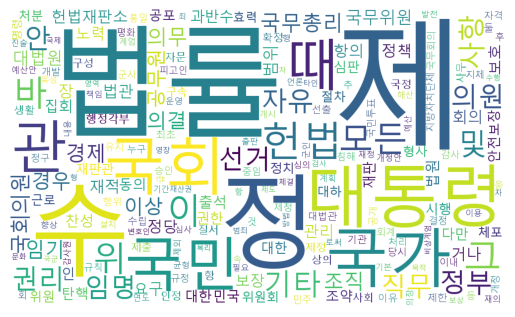

In [40]:
from wordcloud import WordCloud

font_path = 'c:/windows/fonts/malgun.ttf'
wc = WordCloud(width = 1000, height = 600,background_color="white", font_path=font_path)

plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()

> 영어 품사 분석

In [43]:
import nltk
import urllib

nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
from nltk import pos_tag
a = 'I love you.'
tags = pos_tag(a.split())
print(tags)

[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


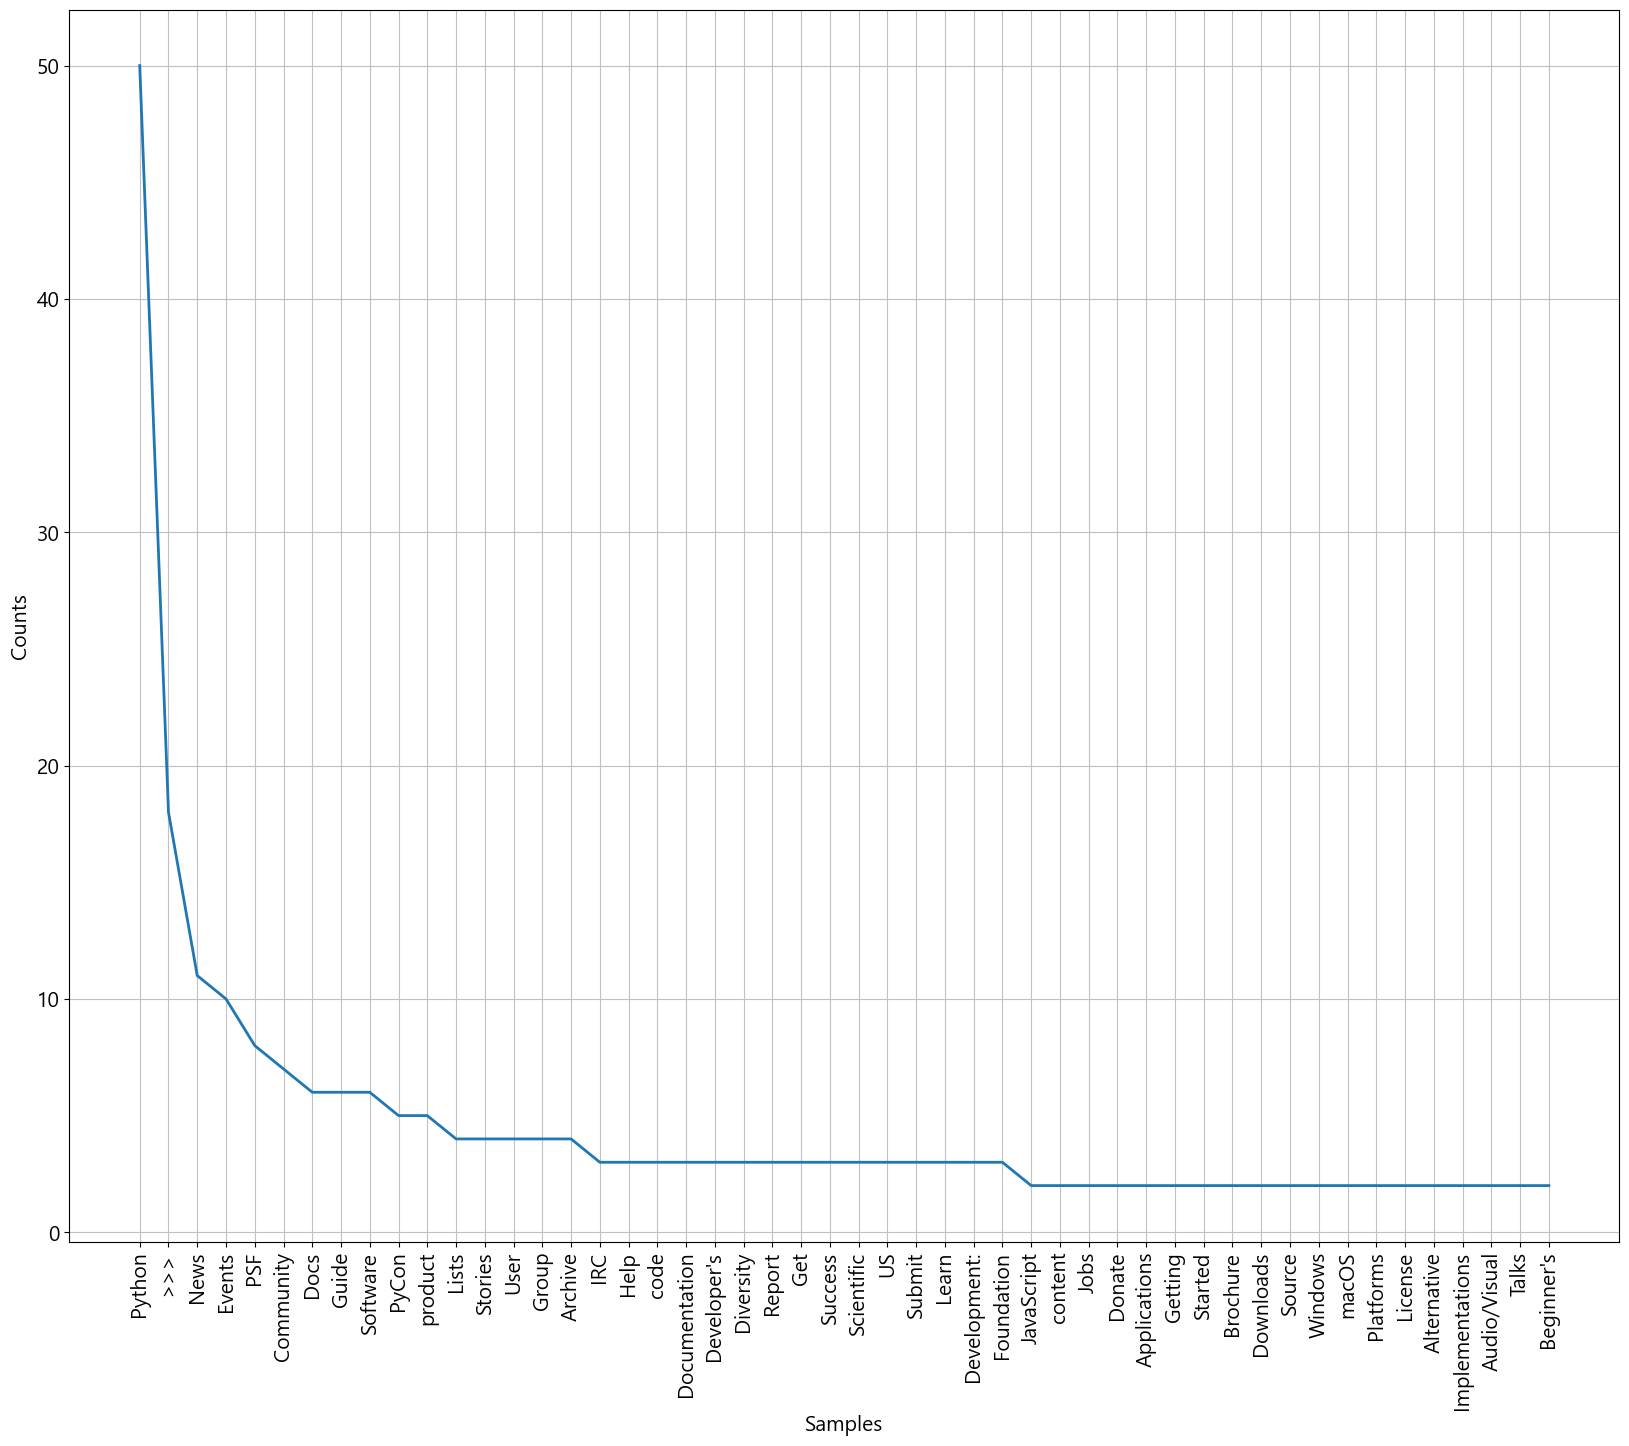

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,16)
plt.rcParams['font.size']=15
res = urllib.request.urlopen('http://python.org/')
html = res.read()

# \W+ : 알파벳,숫자,_만 선택
tokens = re.split('\W+', html.decode('utf-8'))
clean = BeautifulSoup(html,'html.parser').get_text()
tokens = [token for token in clean.split()]

stop = set(stopwords.words('english'))
clean_tokens = [token for token in tokens
            if len(token.lower())>1 and (token.lower() not in stop)]

#보통명사, 고유명사만 추출
tagged = nltk.pos_tag(clean_tokens)
allnoun = [word for word,pos in tagged if pos in ['NN','NNP']]
freq_result = nltk.FreqDist(allnoun)
freq_result.plot(50, cumulative=False)